In [204]:
import numpy as np
import pandas as pd
from teamName import getMyPosition as getPosition
from eval import loadPrices
import matplotlib.pyplot as plt

nInst = 0
nt = 0

# Commission rate
commRate = 0.0025 # was 0.0050

# Dollar position limit (maximum absolute dollar value of any individual stock position)
dlrPosLimit = 10000

timeOut=600 

pricesFile="./prices.txt"
prcAll = loadPrices(pricesFile)
prcAll
#df = pd.DataFrame(prcAll)
#df

array([[40.44, 40.58, 40.52, ..., 43.66, 43.61, 43.52],
       [ 4.9 ,  4.88,  4.9 , ...,  4.14,  4.14,  4.12],
       [30.92, 30.95, 31.02, ..., 28.59, 28.64, 28.68],
       ...,
       [11.12, 11.15, 11.16, ...,  9.82,  9.81,  9.79],
       [33.32, 33.35, 33.31, ..., 33.86, 34.06, 34.17],
       [41.1 , 41.35, 41.82, ..., 38.07, 39.07, 38.84]])

In [205]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

inst_data = prcAll[60]
inst_data

array([5.96, 5.96, 5.96, 5.96, 5.95, 5.94, 5.93, 5.92, 5.91, 5.9 , 5.89,
       5.88, 5.87, 5.87, 5.86, 5.85, 5.84, 5.83, 5.83, 5.83, 5.83, 5.83,
       5.83, 5.82, 5.82, 5.81, 5.8 , 5.79, 5.79, 5.79, 5.78, 5.77, 5.76,
       5.75, 5.74, 5.74, 5.73, 5.73, 5.72, 5.71, 5.7 , 5.69, 5.69, 5.68,
       5.67, 5.66, 5.66, 5.66, 5.66, 5.66, 5.66, 5.66, 5.65, 5.65, 5.65,
       5.65, 5.64, 5.63, 5.62, 5.61, 5.6 , 5.59, 5.58, 5.57, 5.56, 5.55,
       5.54, 5.54, 5.53, 5.53, 5.52, 5.51, 5.51, 5.51, 5.51, 5.51, 5.5 ,
       5.49, 5.49, 5.49, 5.49, 5.49, 5.49, 5.49, 5.49, 5.48, 5.47, 5.46,
       5.45, 5.44, 5.43, 5.42, 5.41, 5.4 , 5.39, 5.38, 5.38, 5.37, 5.36,
       5.35, 5.34, 5.33, 5.32, 5.31, 5.31, 5.31, 5.31, 5.31, 5.31, 5.31,
       5.31, 5.31, 5.31, 5.3 , 5.29, 5.29, 5.28, 5.28, 5.27, 5.27, 5.26,
       5.25, 5.25, 5.24, 5.24, 5.24, 5.24, 5.23, 5.22, 5.21, 5.2 , 5.19,
       5.18, 5.17, 5.17, 5.17, 5.17, 5.17, 5.17, 5.16, 5.15, 5.14, 5.14,
       5.14, 5.13, 5.12, 5.12, 5.12, 5.12, 5.12, 5.

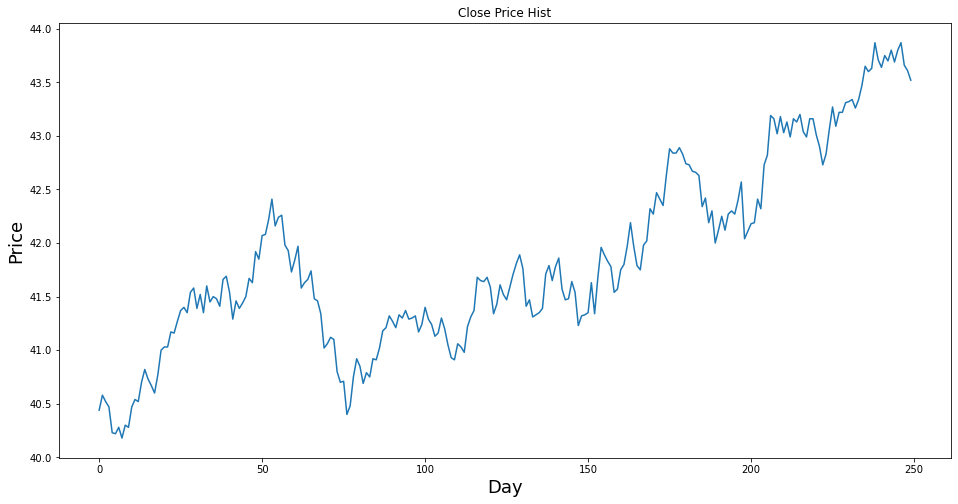

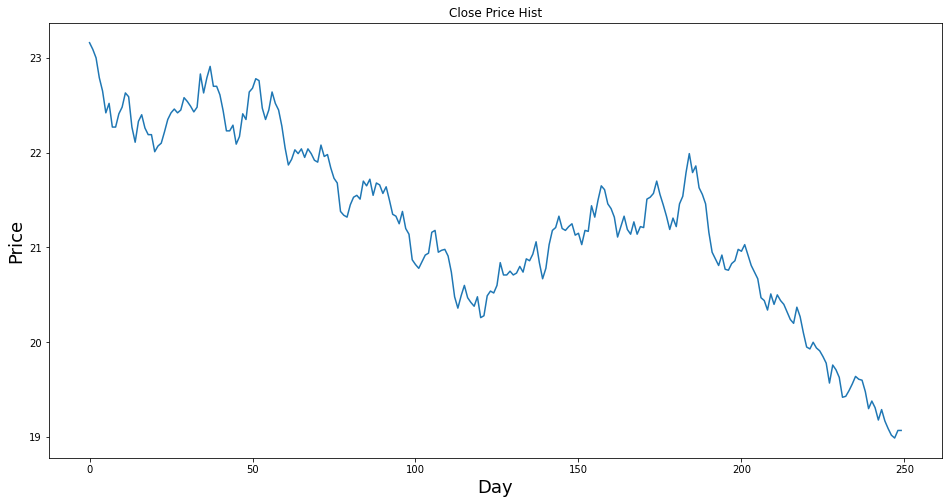

In [206]:
plt.figure(figsize=(16,8))
plt.title("Close Price Hist")
plt.plot(prcAll[0])
plt.xlabel("Day", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title("Close Price Hist")
plt.plot(prcAll[10])
plt.xlabel("Day", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

In [207]:
# scale
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(inst_data)

#scaled_data

In [208]:
train_set = inst_data[:180]

x_train = []
y_train = []

for i in range(60, len(train_set)):
    x_train.append(train_set[i-60:i])
    y_train.append(train_set[i])

train_set

array([5.96, 5.96, 5.96, 5.96, 5.95, 5.94, 5.93, 5.92, 5.91, 5.9 , 5.89,
       5.88, 5.87, 5.87, 5.86, 5.85, 5.84, 5.83, 5.83, 5.83, 5.83, 5.83,
       5.83, 5.82, 5.82, 5.81, 5.8 , 5.79, 5.79, 5.79, 5.78, 5.77, 5.76,
       5.75, 5.74, 5.74, 5.73, 5.73, 5.72, 5.71, 5.7 , 5.69, 5.69, 5.68,
       5.67, 5.66, 5.66, 5.66, 5.66, 5.66, 5.66, 5.66, 5.65, 5.65, 5.65,
       5.65, 5.64, 5.63, 5.62, 5.61, 5.6 , 5.59, 5.58, 5.57, 5.56, 5.55,
       5.54, 5.54, 5.53, 5.53, 5.52, 5.51, 5.51, 5.51, 5.51, 5.51, 5.5 ,
       5.49, 5.49, 5.49, 5.49, 5.49, 5.49, 5.49, 5.49, 5.48, 5.47, 5.46,
       5.45, 5.44, 5.43, 5.42, 5.41, 5.4 , 5.39, 5.38, 5.38, 5.37, 5.36,
       5.35, 5.34, 5.33, 5.32, 5.31, 5.31, 5.31, 5.31, 5.31, 5.31, 5.31,
       5.31, 5.31, 5.31, 5.3 , 5.29, 5.29, 5.28, 5.28, 5.27, 5.27, 5.26,
       5.25, 5.25, 5.24, 5.24, 5.24, 5.24, 5.23, 5.22, 5.21, 5.2 , 5.19,
       5.18, 5.17, 5.17, 5.17, 5.17, 5.17, 5.17, 5.16, 5.15, 5.14, 5.14,
       5.14, 5.13, 5.12, 5.12, 5.12, 5.12, 5.12, 5.

In [209]:
# convert to np array
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[5.96, 5.96, 5.96, ..., 5.63, 5.62, 5.61],
       [5.96, 5.96, 5.96, ..., 5.62, 5.61, 5.6 ],
       [5.96, 5.96, 5.95, ..., 5.61, 5.6 , 5.59],
       ...,
       [5.28, 5.27, 5.27, ..., 5.02, 5.02, 5.02],
       [5.27, 5.27, 5.26, ..., 5.02, 5.02, 5.02],
       [5.27, 5.26, 5.25, ..., 5.02, 5.02, 5.01]])

In [210]:
# reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [211]:
# lstm model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [212]:
# compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [213]:
# train
model.fit(x_train, y_train, batch_size=1, epochs=1)

120/120 [==============================] - 2s 7ms/step - loss: 0.5885


In [214]:
# test set
test_data = inst_data[len(train_set)-60:]

x_test = []
y_test = inst_data[len(train_set):]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i])


In [215]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [216]:
predictions = model.predict(x_test)
print(predictions)
y_test

3/3 [==============================] - 0s 4ms/step
[[5.142802 ]
 [5.142544 ]
 [5.1422014]
 [5.141924 ]
 [5.1415544]
 [5.141282 ]
 [5.141019 ]
 [5.1407223]
 [5.1403923]
 [5.1400123]
 [5.1397204]
 [5.1394596]
 [5.139222 ]
 [5.139051 ]
 [5.138835 ]
 [5.1387153]
 [5.1384816]
 [5.138196 ]
 [5.1379285]
 [5.137625 ]
 [5.137248 ]
 [5.136912 ]
 [5.1366096]
 [5.1364226]
 [5.13607  ]
 [5.13578  ]
 [5.1353955]
 [5.135034 ]
 [5.134741 ]
 [5.1345453]
 [5.134228 ]
 [5.133922 ]
 [5.133687 ]
 [5.1333494]
 [5.1330295]
 [5.1327863]
 [5.1325874]
 [5.1323547]
 [5.13205  ]
 [5.1317153]
 [5.1313066]
 [5.1309776]
 [5.1305957]
 [5.1301355]
 [5.1297865]
 [5.1295457]
 [5.1292686]
 [5.1290474]
 [5.12885  ]
 [5.1286793]
 [5.1286345]
 [5.1285105]
 [5.1283   ]
 [5.1280975]
 [5.1280026]
 [5.1279087]
 [5.1277494]
 [5.127657 ]
 [5.1274695]
 [5.127218 ]
 [5.126851 ]
 [5.1266456]
 [5.1264176]
 [5.1262527]
 [5.126109 ]
 [5.1258497]
 [5.1255417]
 [5.125233 ]
 [5.124951 ]
 [5.1250196]]


array([4.99, 4.98, 4.97, 4.96, 4.96, 4.95, 4.94, 4.93, 4.92, 4.92, 4.92,
       4.92, 4.92, 4.91, 4.91, 4.9 , 4.89, 4.88, 4.87, 4.86, 4.85, 4.85,
       4.85, 4.84, 4.83, 4.82, 4.81, 4.81, 4.81, 4.8 , 4.79, 4.79, 4.78,
       4.77, 4.77, 4.77, 4.76, 4.75, 4.74, 4.73, 4.72, 4.71, 4.7 , 4.7 ,
       4.7 , 4.69, 4.69, 4.69, 4.69, 4.69, 4.69, 4.68, 4.68, 4.68, 4.68,
       4.67, 4.67, 4.66, 4.65, 4.64, 4.64, 4.64, 4.64, 4.64, 4.63, 4.62,
       4.62, 4.62, 4.62, 4.62])

In [217]:
# rmse
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.35623952811104914

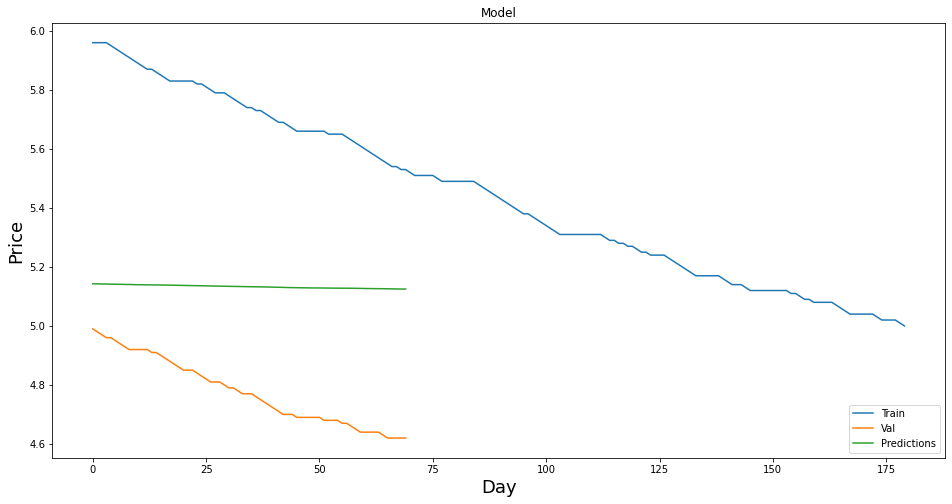

In [218]:
# plot
train = inst_data[:len(train_set)]
valid= inst_data[len(train_set):]


# visualise
plt.figure(figsize=(16,8))
plt.title("Model")
plt.plot(train)
plt.plot(valid)
plt.plot(predictions)
plt.xlabel("Day", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.legend(["Train", "Val","Predictions"], loc = "lower right")
plt.show()

